In [163]:
# This cell can be used to import all the necessary libraries for the exam
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                                  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score, roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure

# Dataset 1
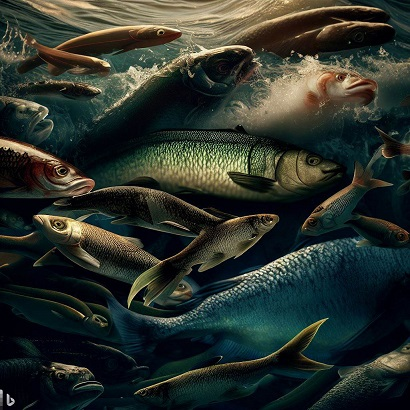

__Image generated using bing create__

The first dataset we will take a look at is about fish. It contains information about different species of fish. The data is stored in the file `Fish.csv`. The columns are:
* Species: the species of the fish
* Weight: the weight of the fish in grams
* Length1: the vertical length of the fish in cm
* Length2: the diagonal length of the fish in cm
* Length3: the cross length of the fish in cm
* Height: the height of the fish in cm
* Width: the diagonal width of the fish in cm

The fish company wants to estimate the weight of fish without weighing them. They plan to take a picture of the fish and use it to predict the weight based on the length, width, height, and species of the fish. They have asked you to help them build a model that can predict the weight of a fish based on these variables.

## Importing the data (2pt)

* Read in the data from Fish.csv
* Show the first 5 rows of the data
* Show the number of rows and columns in this dataset
* Show some descriptive statistics  (count, min, max, std...) of the data

In [164]:
# Read in the data
data = pd.read_csv("data/Fish.csv")

In [165]:
# Show the first 5 rows of the data
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [166]:
# Show the number of rows & columns
print(f"The number of rows & columns: {data.shape}")

The number of rows & columns: (159, 7)


In [167]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Exploring the data a bit more (2pt)
* Are there any missing values? 
    * In both cases (whether or not there are missing values), provide the code that would remove the rows with missing values 
* Are there any outliers (Z-score >5) in the numerical columns? 
    * Give the code that checks this.
    * You don't need to remove any outliers if there are any. 

In [168]:
# Can see the columns containing missing values
print("Columns containg empty values:\n",np.sum(data.isna(), axis=0))

Columns containg empty values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [169]:
#To be sure can print the rows if there are any
print("How many rows with missing values:\n",np.sum((data.isna().any(axis = 1))))
#There are none missing rows
data[data.isna().any(axis=1)]

How many rows with missing values:
 0


,Species,Weight,Length1,Length2,Length3,Height,Width


In [170]:
# Dropping rows with missing values
data.dropna(how="any", axis = 0, inplace=True)

In [171]:
# Use the following function to determine the zscore for each value
data_no_outliers = data[(zscore(data[["Weight","Length1","Length2","Length3","Height","Width"]])<=5).all(axis=1)]

# Take a look at the new shape of the dataframe
data_no_outliers.shape
# There are non so do not need to be removed

(159, 7)

## Regression (4pt)
Build a linear regression model that uses L2 regression to predict the weight of the fish based on the other variables.
* split the data into features and target (weight)
* Transform the categorical variable `Species` into a numerical variable using pandas get_dummies
* split the data into training and test set (use a test size of 0.2) 
* train the model on the training data 
* evaluate the model on the test data using the score method 
* show the coefficients + intercept of the model 
* show the mean absolute error and mean squared error on the test set

In [172]:
# Split the data into features & targets 
X = data.drop("Weight", axis = 1)
y = data["Weight"]

In [173]:
# Transform the categorical variable Species into numerical values
features_w_dummies = pd.get_dummies(X,columns=["Species"])

In [174]:
features_w_dummies

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [175]:
# Split into training & test set based on the features & targets. 
X_train, X_test, y_train, y_test = train_test_split(features_w_dummies, y, test_size=0.2, random_state= 24)

In [176]:
# Train the model on the trainig data use Linear Regression & L2 aka Ridge 
LinRidge = Ridge(alpha=1)
# Data does not chang only Fit (No transform).
LinRidge.fit(X_train, y_train)
# Predict X_test
y_pred = LinRidge.predict(X_test)

Ridge_train_score = LinRidge.score(X_train,y_train)
Ridge_test_score = LinRidge.score(X_test, y_test)

print(f"The coefficients: {(coef := LinRidge.coef_)}")
print(f"The Intercept: {(intercept := LinRidge.intercept_)}")

columns = X_train.columns

coefpart = " + ".join([f"{round(coefficient,3)} * {feature}" for feature,coefficient in zip(columns,coef)])

print(f"\nPredicted Weight = {coefpart} + {intercept}")

The coefficients: [  -6.09495668   25.29755737    7.10069349   17.51887246   30.84605218
  -80.74249748   -1.97995367    1.15572307 -171.61847269  -10.89148973
  253.67789563   10.39879487]
The Intercept: -671.183824889529

Predicted Weight = -6.095 * Length1 + 25.298 * Length2 + 7.101 * Length3 + 17.519 * Height + 30.846 * Width + -80.742 * Species_Bream + -1.98 * Species_Parkki + 1.156 * Species_Perch + -171.618 * Species_Pike + -10.891 * Species_Roach + 253.678 * Species_Smelt + 10.399 * Species_Whitefish + -671.183824889529


In [177]:
print("Ridge Train score: ",Ridge_train_score )
print("Ridge Test score: ",Ridge_test_score )

Ridge Train score:  0.9376782580485261
Ridge Test score:  0.8931772642660931


In [178]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

MAE: 96.71031295328063
MSE: 20006.035046203207


### <span style="color:red">Questions (2pt)</span>
1. What does the `score` method from a Linear Regression Model represent? What would it mean if the model had a score of 0? 

It returns the coefficient as determination as predictor. The proportion of the variability based on the features. It will say how accurate it can predict with a value of 1 being a perfect prediction. Score of 0 says it can not predict the score or has 0 chance of having it correct having a really bad score. 


2. Is the model under- and/or overfitting? Explain.

The model may be leading to overfitting. The the train score is relatively high having a score of 0.93. The score of the test set is a bit lower being 0.89 which may be due to overfitting of the data the test score is a bit lower. But overall the scores are pretty good indicating nu underfitting. But overfitting could be because of the lower test score in compared to train score.

# Dataset 2

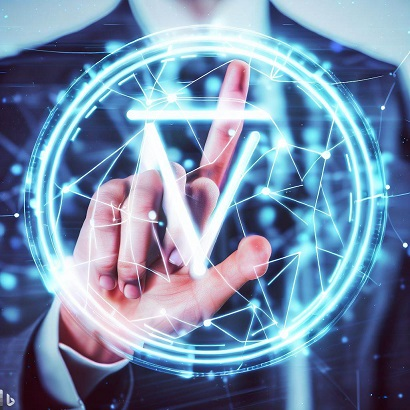

__Image generated using bing create__

This dataset contains images of american sign language letters. The images are 28x28 pixels and are grayscale. The goal is to classify the images into the correct letter.

The dataset contains a "label" column which contains the correct letter for each image. The images are stored per pixel in columns "pixel0" to "pixel783". Each pixel has a value between 0 and 255.

Since this dataset is already preprocessed, the cleaning steps can be skipped.



## Importing the data
* read the data from the sign_mnist.csv file
* show the first 5 rows of the dataset
* show the number of rows and columns of the dataset

In [179]:
# Read in the data
data_mnist = pd.read_csv("data/sign_mnist.csv")

In [180]:
# Show the first 5 rows
data_mnist.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Y,118,122,126,129,134,139,143,147,150,...,103,104,103,102,100,99,99,99,97,96
1,I,173,173,174,174,175,176,176,177,177,...,146,139,127,100,177,232,220,223,223,221
2,S,83,88,94,100,108,115,121,127,132,...,81,66,137,182,181,184,186,186,187,188
3,C,167,169,168,167,167,169,169,169,169,...,223,223,222,221,220,220,218,217,218,193
4,Y,120,124,128,132,137,141,144,148,150,...,68,44,84,93,96,96,82,126,144,103


In [181]:
# Show the numbers of rows & columns
data_mnist.shape

(8237, 785)

## Data exploration (1,5pt)
* Split data into features and labels (X and y)
* Visualize an image from the dataset, similarly to the MNIST digits dataset <span style="color:red">(0.5)</span>
* Visualize the distribution of the labels (using a count plot) to see whether or not the dataset is balanced. Make sure that the labels are sorted alphabetically <span style="color:red">(1)</span>

In [182]:
# features & target (labels)
X = data_mnist.drop("label", axis = 1)
y = data_mnist["label"]

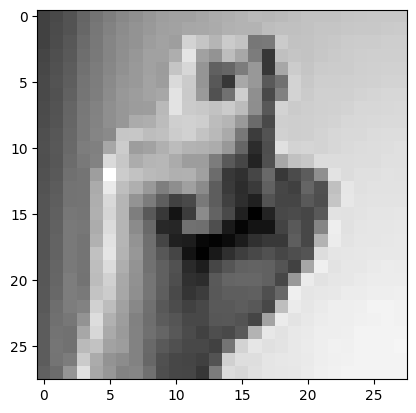

In [183]:
#Visualize an image of the dataset >> Handsigns from the alphabet
plt.imshow(X.values[20].reshape(28,28),cmap="gray")

<Axes: xlabel='label', ylabel='count'>

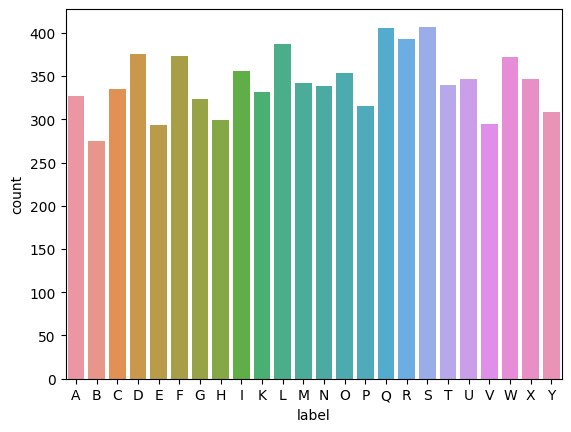

In [184]:
# Sort the labels alphabetically
data_mnist.sort_values(by=['label'], inplace=True)
# Visualize the distribution of labels
sns.countplot(data_mnist, x="label")

### <span style="color:red">Question (0.5pt)</span>
* Is this data balanced or not? Explain.

Could say that there is quite a variance between the values of each colun. But overall the data has some fluctuations but does not show like a really bi class and the others are all small. Could say that the data is quite balanced. 

## Dimensionality reduction (3pt)
Since our dataset is quite large, we will use PCA to reduce the dimensionality of the dataset. We will use 95% of the variance as a threshold.
* Make a train and test set. Use 30% of the data for the test set 
* Use PCA to reduce the dimensionality of the dataset to 94% of the variance (training set). Determine the number of components needed 
    * Hint: how do we get the total explained variance (cumulative sum of explained variance) from the PCA object?
* Perform the dimensionality reduction on the train and test set with the determined amount of components 

**Note:** If you are unable to determine the number of components needed, you can use 100 components for the rest of the exam.

In [185]:
# Make a train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 19)

In [186]:
# Fit a model to retain the varaince below 95 % of the set
PCA_model = PCA()
PCA_model.fit(X_train)

PCA()

In [187]:
PCA_explained_cumulative = np.cumsum(PCA_model.explained_variance_ratio_)

count = 0
for item in PCA_explained_cumulative:
    if item >= 0.94:
        print(count)
        break
    else:
        count += 1

94


In [188]:
print("The 93 component: ",PCA_explained_cumulative[93])
print("The 94 component: ", PCA_explained_cumulative[94])

The 93 component:  0.9399076062732478
The 94 component:  0.9406290172212376


In [189]:
#Can check how many components are kept in total to retain the threshold. 
PCA_model.n_components_

784

In [190]:
PCAMod = PCA(n_components = 94)
X_train_pca = PCAMod.fit_transform(X_train)
X_test_pca = PCAMod.transform(X_test)

## Logistic regression (2.5pt)
Perform logistic regression to predict the letter of the image. Use the following steps
* Perform a **grid search** where you do the following: 
    * Perform a 5-fold cross validation
    * Test 10 C-values between 0.0001 and 1
    * Test both no (=None) and L2 regularisation 
* What are the best parameters for the model? 
* Print the score for both the training and the test set 
* Print the precision, recall and F1-score for the test set

In [191]:
LogModel=LogisticRegression() 
# All the parameters we want to test
parameters = [{"C":np.linspace(0.0001,1,10),  
               "penalty":["l2",None]
              }] 

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=LogModel,
                           n_jobs=-1, 
                           cv = 5,
                           param_grid=parameters,             
                           verbose=4
                           )
# Fit the training data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\uniro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                          'penalty': ['l2', None]}],
             verbose=4)

In [199]:
print(f"Score of best train model: {grid_search.score(X_train_pca,y_train)}")
print(f"Score of best test model: {grid_search.score(X_test_pca,y_test)}")

# What where the best parameters for out model?
print("\nBest parameters:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Score of best train model: 1.0
Score of best test model: 0.9906957928802589

Best parameters:
{'C': 0.11120000000000001, 'penalty': 'l2'}
LogisticRegression(C=0.11120000000000001)


In [193]:
y_pred_test = grid_search.predict(X_test_pca)

In [194]:
print("="*30 + "\nY-TEST SET\n" + "="*30)
print("Recall: ", recall_score(y_test, y_pred_test, average='macro'))
print("Precision: ",precision_score(y_test, y_pred_test, average='macro'))
print("F1-score: ", f1_score(y_test, y_pred_test, average='macro'))


Y-TEST SET
Recall:  0.9912995280071685
Precision:  0.9908678708416904
F1-score:  0.9909570561190805


## Decision trees (5pt)
Finally let's also create a pipeline that runs a random forest tree model.
* The pipeline should first perform PCA to reduce to the same number of components as the logistic regression model
* Then it should perform a random forest classifier with the following parameters: 
    * Allow bootstrapping
    * Let each tree use 30% of the training samples
    * Allow up to 10 splits per tree
    * Use 50 decision trees
    * Use a balanced class weight
* Fit the pipeline on the training data 
* Print the score for both the training and the test set 
* On the test set, perform the following:
    * Display the confusion matrix in a nice plot with labels (take a look at the ConfusionMatrixDisplay from sklearn)
    * Print the recall, precision, and f1 score for each class (you can ignore if the output is truncated with "...")

In [195]:
# Create a pipeline for Random forest tree
pipe = Pipeline([('PCA', PCA(n_components=94)),
                ('ForestClas', RandomForestClassifier(bootstrap = True,
                                                    max_samples= 0.3,
                                                    class_weight= "balanced",
                                                    n_estimators= 50,
                                                    max_depth= 10))
                ])

# Fit the model on the training set, and print the score of the test set
pipe.fit(X_train,y_train)

Pipeline(steps=[('PCA', PCA(n_components=94)),
                ('ForestClas',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_samples=0.3, n_estimators=50))])

In [196]:
print(f"The score of the trainig model: {pipe.score(X_train,y_train)}")
print(f"The score of the test model: {pipe.score(X_test,y_test)}")

The score of the trainig model: 0.9956634865568084
The score of the test model: 0.9724919093851133


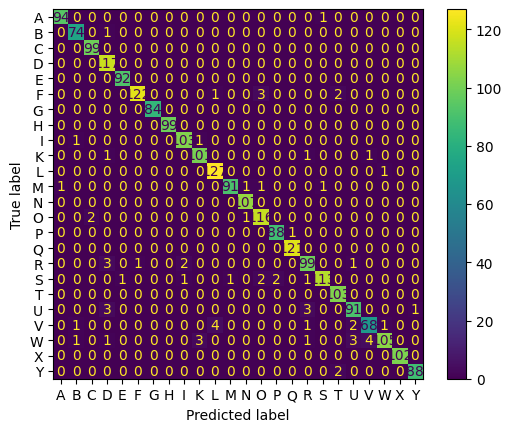

In [197]:
y_pred_test = pipe.predict(X_test)

cf_test = confusion_matrix(y_test,y_pred_test)
matrix_test = ConfusionMatrixDisplay(cf_test ,display_labels=pipe.classes_)

matrix_test.plot()
plt.show()

In [198]:
print("\nClassification report of the test set \n",classification_report(y_test, y_pred_test))


Classification report of the test set 
               precision    recall  f1-score   support

           A       0.99      0.99      0.99        95
           B       0.96      0.99      0.97        75
           C       0.98      1.00      0.99        99
           D       0.93      1.00      0.96       117
           E       0.99      1.00      0.99        92
           F       0.99      0.95      0.97       128
           G       1.00      1.00      1.00        84
           H       1.00      1.00      1.00        99
           I       0.97      0.98      0.98       105
           K       0.96      0.97      0.97       104
           L       0.96      0.99      0.98       128
           M       0.99      0.96      0.97        95
           N       0.98      1.00      0.99       107
           O       0.95      0.97      0.96       119
           P       0.98      0.99      0.98        89
           Q       0.99      1.00      1.00       121
           R       0.93      0.93      0

### <span style="color:red">Questions (2.5pt)</span>
1. Is this a better or a worse model than your logistic regression model? Explain. 

It is a worse model since the logistic regresison had a score of 1 for the train model and 0.99 for the test model, while the randomforest classifier has a score for the train model of 0.99 and for the tes model 0.972. Meaning the logistic regression had a perfect prediciton for the model which the forest classifier did not and the score was better of test from logistic even by a little. Still both got an overall high score. 

2. Discuss whether or not it would be a good idea to create a ROC curve for both models to compare them. Why or why not?

It would be a bad idea since it can plot for binary classifiers, which is not the casae here it is a multiclass classifier having up to 26 classes (alphabet). 

3. Describe what is depicted in a ROC curve (x-axis, y-axis, what makes a good ROC curve...).

Plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The more true positives it has & fewer false positives the better the results of the curve. The y-axis plots the True Positive rate while the x-axis plots the False Positive rates. 

## Small bonus question (not graded)
If you have time left, you can try to decode the message in the `bonus.csv` file. The message is encoded using the same method as the dataset but does not have a label column. 

The images are stored per pixel in columns "pixel0" to "pixel783". Each pixel has a value between 0 and 255.

* Read the data from the bonus.csv file
* Use a model you trained to predict the letters
* Decode the message 🙂